In this notebook we will classify text messages into spam or not spam. During this process, we will go through various NLP related tasks that we have discusse in the note.

In [ ]:
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

#install nltk if you don't have it and also you may need to download many files related to nltk by nltk.download()

In [ ]:
#nltk.download() #will take time. You can also download individual items such as nltk.download('wordnet'), nltk.download('stopwords')
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Exercise with some common NLP terminologies

In [ ]:
#List of parts of speecth POS tages:https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html 


### Lemmatizer example

In [ ]:
#Lemmatizer
from nltk.stem import WordNetLemmatizer 
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize Single Word
print(lemmatizer.lemmatize("bats"))

print(lemmatizer.lemmatize("are"))

print(lemmatizer.lemmatize("feet"))

print(lemmatizer.lemmatize("caring"))

print(lemmatizer.lemmatize("running"))

print(lemmatizer.lemmatize("went"))



LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\matth/nltk_data'
    - 'C:\\Users\\matth\\anaconda3\\envs\\MLAlgs\\nltk_data'
    - 'C:\\Users\\matth\\anaconda3\\envs\\MLAlgs\\share\\nltk_data'
    - 'C:\\Users\\matth\\anaconda3\\envs\\MLAlgs\\lib\\nltk_data'
    - 'C:\\Users\\matth\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### Tokenizing a sentence and apply lemmtizer

In [ ]:
#let's do it for a sentence. At first we will tokenize the sentence
# Define the sentence to be lemmatized

sentence = "The striped bats are hanging on their feet for best"

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)

print(word_list)
#> ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

print(lemmatized_output)
#> The striped bat are hanging on their foot for best


The above code is a simple example of how to use the wordnet lemmatizer on words and sentences. Notice it didn’t do a good job. Because, ‘are’ is not converted to ‘be’ and ‘hanging’ is not converted to ‘hang’ as expected. This can be corrected if we provide the correct ‘part-of-speech’ tag (POS tag) as the second argument to lemmatize(). Sometimes, the same word can have a multiple lemmas based on the meaning / context.

In [ ]:
print(lemmatizer.lemmatize("stripes", 'v'))  
#> strip

print(lemmatizer.lemmatize("stripes", 'n'))  
#> stripe

In [ ]:
print(lemmatizer.lemmatize("bats"))

print(lemmatizer.lemmatize("are"))

print(lemmatizer.lemmatize("feet"))

print(lemmatizer.lemmatize("caring", 'v'))

print(lemmatizer.lemmatize("running", 'v'))

print(lemmatizer.lemmatize("went", 'v'))

It may not be possible manually provide the corrent POS tag for every word for large texts. So, instead, we will find out the correct POS tag for each word, map it to the right input character that the WordnetLemmatizer accepts and pass it as the second argument to lemmatize(). So how to get the POS tag for a given word? In nltk, it is available through the nltk.pos_tag() method. It accepts only a list (list of words), even if its a single word.

In [ ]:
print(nltk.pos_tag(['caring']))


[('caring', 'VBG')]


In [ ]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Lemmatize Single Word with the appropriate POS tag
word = 'feet'
print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))

# 3. Lemmatize a Sentence with the appropriate POS tag
sentence = "The striped bats are hanging on their feet for best"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])
#> ['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\matth/nltk_data'
    - 'C:\\Users\\matth\\anaconda3\\envs\\MLAlgs\\nltk_data'
    - 'C:\\Users\\matth\\anaconda3\\envs\\MLAlgs\\share\\nltk_data'
    - 'C:\\Users\\matth\\anaconda3\\envs\\MLAlgs\\lib\\nltk_data'
    - 'C:\\Users\\matth\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


You can also explore othe rlemmatizer such as TextBlob, spaCy, Stanford CoreNLP Lemmatization, etc

### Stemming example

In [ ]:
#There are many stemmer avaialbe. Let's explore some of them
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Stemming Single Word
print(stemmer.stem("bats"))

print(stemmer.stem("are"))

print(stemmer.stem("feet"))

print(stemmer.stem("caring"))

print(stemmer.stem("running"))

print(stemmer.stem("went"))
print(stemmer.stem("going"))
print(stemmer.stem("ability"))


bat
are
feet
care
run
went
go
abil


In [ ]:
sentence = "The striped bats are hanging on their feet for best"

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)

print(word_list)
#> ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']

# Lemmatize list of words and join
stemmed_output = ' '.join([stemmer.stem(w) for w in word_list])

print(stemmed_output)
#> the striped bat ar hang on their feet for best

['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
the stripe bat are hang on their feet for best


In [ ]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

# Stemming Single Word
print(stemmer.stem("bats"))

print(stemmer.stem("are"))

print(stemmer.stem("feet"))

print(stemmer.stem("caring"))

print(stemmer.stem("running"))

print(stemmer.stem("went"))
print(stemmer.stem("going"))
print(stemmer.stem("ability"))

bat
ar
feet
car
run
went
going
abl


In [ ]:
sentence = "The striped bats are hanging on their feet for best"

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)

print(word_list)
#> ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']

# Lemmatize list of words and join
stemmed_output = ' '.join([stemmer.stem(w) for w in word_list])

print(stemmed_output)
#> the striped bat ar hang on their feet for best

['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
the striped bat ar hang on their feet for best


# SMS classification example

In [ ]:
#download the file from here: "https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection"

#Read the data and put themi n a list. rstrip() will help to remove any unnecessary spaces after the string
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

FileNotFoundError: [Errno 2] No such file or directory: 'SMSSpamCollection'

In [ ]:
#See some messages
for message in messages[:10]:
    print(message)
    print('\n')

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


ham	Ok lar... Joking wif u oni...


spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


ham	U dun say so early hor... U c already then say...


ham	Nah I don't think he goes to usf, he lives around here though


spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


ham	Even my brother is not like to speak with me. They treat me like aids patent.


ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 ho

In [ ]:
#it looks like a tab separated values 
#Let's read the values in a pandas dataframe

data=  pd.read_csv('SMSSpamCollection', sep = '\t', names = ["label", "message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


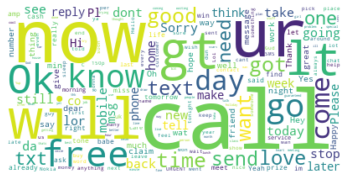

In [ ]:
#let us do some exploratory data analysys
#create big text to generate wordcloud
text = " ".join(cat for cat in data.message)
#text2 = " ".join(title for title in df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#consider generating wordcloud for spam and ham separately 

In [ ]:
data['length'] = data['message'].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


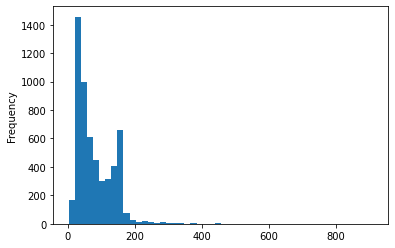

In [ ]:
data['length'].plot(bins=50, kind='hist') 

In [ ]:
data.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
#Some message has 910 char! Let's see the message
data[data['length'] == 910]['message'].iloc[0]



"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4eb5c0c90>,
      dtype=object)

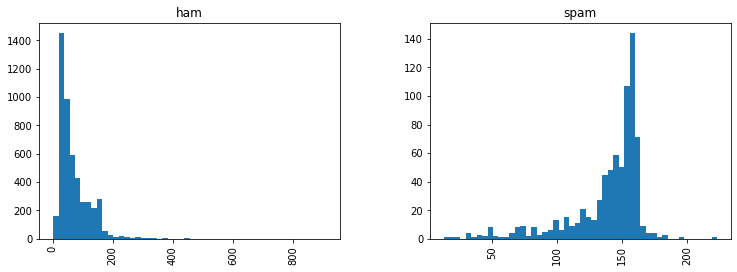

In [ ]:
#Let's see the lenght of ham and spam messages
data.hist(column='length', by='label', bins=50,figsize=(12,4))

In [ ]:
#looks like spam mesages are lengthy compared to ham

In [ ]:
#text processing example

import string

mess = 'Good Morning! Hi: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)
print(nopunc)

Good Morning Hi it has punctuation


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
nopunc.split()
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Good', 'Morning', 'Hi', 'punctuation']

## Writing a function to process our texts

In [ ]:
#Write a functin that will process the strings. You can imporove it. ALso note that you can use your own stop words
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

    stopwordList = stopwords.words('english')

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

In [ ]:
# see the data before preprocessing
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Check to make sure its working. Just applying the functin to top 5 rows without chaning my data frame
data['message'].head(5).apply(text_process)

0    [go, jurong, point, crazy, avail, bug, n, gre,...
1                           [ok, lar, jok, wif, u, on]
2    [fre, entry, 2, wkly, comp, win, fa, cup, fin,...
3          [u, dun, say, ear, hor, u, c, already, say]
4    [nah, i, dont, think, goe, usf, liv, around, t...
Name: message, dtype: object

In [ ]:
# Show original dataframe
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#To create features from the texts
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['message']) #see we are passing our functio name in the analyzer

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

7583


In [ ]:
messages_bow = bow_transformer.transform(data['message'])
messages_bow

<5572x7583 sparse matrix of type '<class 'numpy.int64'>'
	with 55339 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 7583)


In [ ]:
messages_tfidf

<5572x7583 sparse matrix of type '<class 'numpy.float64'>'
	with 55339 stored elements in Compressed Sparse Row format>

# Training a model

In [ ]:
#Training a model
#you shoudl of-course do train test split. But I am skipping that steps here
from sklearn.naive_bayes import MultinomialNB
#spam_detect_model = MultinomialNB().fit(messages_tfidf, data['label'])


In [ ]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test =  train_test_split(data['message'], data['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa4eb1ab0e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1019
        spam       0.70      1.00      0.82        96

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.97      1115



In [ ]:
 from sklearn.metrics import confusion_matrix
confusion_matrix(label_test, predictions)

array([[978,   0],
       [ 41,  96]])

In [ ]:
#Testing with a message
newSMS = "Hello how are you?"
pipeline.predict([newSMS])


array(['ham'], dtype='<U4')

In [ ]:
#Testing with a message
newSMS = "Free entry in 2 a wkly comp to win FA Cup"
pipeline.predict([newSMS])

array(['spam'], dtype='<U4')

# Deep learning

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

In [ ]:
pipeline.fit(msg_train,label_train)

Iteration 1, loss = 0.79667682
Validation score: 0.170404
Iteration 2, loss = 0.64396958
Validation score: 0.946188
Iteration 3, loss = 0.45861233
Validation score: 0.932735
Iteration 4, loss = 0.29216186
Validation score: 0.959641
Iteration 5, loss = 0.17554450
Validation score: 0.984305
Iteration 6, loss = 0.10897925
Validation score: 0.991031
Iteration 7, loss = 0.07215940
Validation score: 0.991031
Iteration 8, loss = 0.05079750
Validation score: 0.991031
Iteration 9, loss = 0.03779495
Validation score: 0.991031
Iteration 10, loss = 0.02930947
Validation score: 0.993274
Iteration 11, loss = 0.02348693
Validation score: 0.993274
Iteration 12, loss = 0.01927031
Validation score: 0.993274
Iteration 13, loss = 0.01621107
Validation score: 0.991031
Iteration 14, loss = 0.01363761
Validation score: 0.991031
Iteration 15, loss = 0.01173722
Validation score: 0.991031
Iteration 16, loss = 0.01015313
Validation score: 0.991031
Iteration 17, loss = 0.00895464
Validation score: 0.991031
Iterat

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa4eb1ab0e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       994
        spam       0.88      0.99      0.93       121

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_test, predictions)

array([[977,   1],
       [ 17, 120]])

# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch 

# Tensof FLow
Self study. Follow the book. This link also could be useful:

https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ 